In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('computers.csv')
df.head()

,Units,Minutes
0,1,23
1,2,29
2,3,49
3,4,64
4,4,74


In [4]:
df.describe()

,Units,Minutes
count,14.000000,14.000000
mean,6.000000,97.214286
std,2.961289,46.217177
min,1.000000,23.000000
25%,4.000000,66.500000
50%,6.000000,96.500000
75%,8.750000,138.500000
max,10.000000,166.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
Units      14 non-null int64
Minutes    14 non-null int64
dtypes: int64(2)
memory usage: 304.0 bytes


### shapiro will determine whether it follows normal distribution or not
###  it gives statstics value and p value
#### we check p value with significant value if(p >sig value) fail to reject null hypothesis ie. it is normally distributed

In [6]:
from scipy.stats import shapiro
print('units',shapiro(df['Units']))
print('minutes',shapiro(df['Minutes']))

units (0.9485411047935486, 0.5382933020591736)
minutes (0.956299901008606, 0.6619864106178284)


### if our df follows normal distribution we can use pearson corelation method to find corelation

In [7]:
df.corr()

,Units,Minutes
Units,1.000000,0.993699
Minutes,0.993699,1.000000


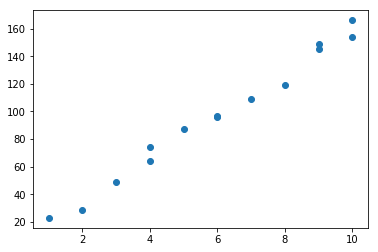

In [8]:
plt.scatter(df['Units'],df['Minutes'])

In [57]:
#miniutes_model0=df['Minutes'].mean()
#miniutes_model1=10+12*df['Units']
#miniutes_model2=4+16*df['Units']
miniutes_model3= 4.161654 + (15.50877 * df['Units'])
#df['min_model0']=miniutes_model0
#df['min_model1']=miniutes_model1
#df['min_model2']=miniutes_model2
df['min_model3']=miniutes_model3

Text(0.5, 1.0, 'speculated model')

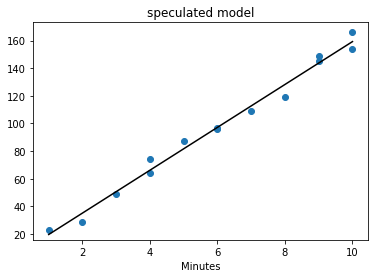

In [59]:
fig,ax=plt.subplots()
ax.scatter(df['Units'],df['Minutes'])
#ax.add_line(plt.Line2D(df['Units'],df['min_model0'],color='red'))
#ax.add_line(plt.Line2D(df['Units'],df['min_model1'],color='black'))
#ax.add_line(plt.Line2D(df['Units'],df['min_model2'],color='green'))
ax.add_line(plt.Line2D(df['Units'],df['min_model3'],color='black'))
#ax.scatterdf['Units'](df['min_model3'],color='blue'))
ax.set_xlabel("Units")
ax.set_xlabel("Minutes")
ax.set_title("speculated model")

In [32]:
model0_obs=pd.DataFrame(np.array([df['Units'],
                                 df['Minutes'],
                                 df['min_model0'],
                                 (df['min_model0']-df['Minutes'])]).T,
                        columns=["Units","actual time","predicted time","error"])
model0_obs

,Units,actual time,predicted time,error
0,1.0,23.0,97.214286,74.214286
1,2.0,29.0,97.214286,68.214286
2,3.0,49.0,97.214286,48.214286
3,4.0,64.0,97.214286,33.214286
4,4.0,74.0,97.214286,23.214286
5,5.0,87.0,97.214286,10.214286
6,6.0,96.0,97.214286,1.214286
7,6.0,97.0,97.214286,0.214286
8,7.0,109.0,97.214286,-11.785714
9,8.0,119.0,97.214286,-21.785714


In [33]:
sum(model0_obs['error']**2)

27768.357142857145

In [100]:
model1_obs=pd.DataFrame(np.array([df['Units'],
                                 df['Minutes'],
                                 df['min_model1'],
                                 (df['min_model1']-df['Minutes'])]).T,
                        columns=["Units","actual time","predicted time","error"])
model1_obs

,Units,actual time,predicted time,error
0,1,23,22,-1
1,2,29,34,5
2,3,49,46,-3
3,4,64,58,-6
4,4,74,58,-16
5,5,87,70,-17
6,6,96,82,-14
7,6,97,82,-15
8,7,109,94,-15
9,8,119,106,-13


In [101]:
sum(model1_obs['error']**2)

4993

In [36]:
model2_obs=pd.DataFrame(np.array([df['Units'],
                                 df['Minutes'],
                                 df['min_model3'],
                                 (df['min_model3']-df['Minutes'])]).T,
                        columns=["Units","actual time","predicted time","error"])
model0_obs

,Units,actual time,predicted time,error
0,1.0,23.0,97.214286,74.214286
1,2.0,29.0,97.214286,68.214286
2,3.0,49.0,97.214286,48.214286
3,4.0,64.0,97.214286,33.214286
4,4.0,74.0,97.214286,23.214286
5,5.0,87.0,97.214286,10.214286
6,6.0,96.0,97.214286,1.214286
7,6.0,97.0,97.214286,0.214286
8,7.0,109.0,97.214286,-11.785714
9,8.0,119.0,97.214286,-21.785714


In [37]:
sum(model2_obs['error']**2)

348.84837092966404

In [53]:
from sklearn.linear_model import LinearRegression

In [56]:
model=LinearRegression()
model.fit(X=df.loc[:,["Units"]],y=df.loc[:,["Minutes"]])
print(model.intercept_)
print(model.coef_)

[4.16165414]
[[15.50877193]]


In [68]:
model.score(np.array(df['Units']).reshape(-1,1),df['Minutes'])

0.9874371980620736

In [82]:
model.summary()

AttributeError: 'LinearRegression' object has no attribute 'summary'